<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/supervised_learning/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def majority_heads_biased(n, p = 0.51):
    successes = 0
    for i in range(n):
        #outcome of the coin toss
        if np.random.random() > 1 - p:
            successes += 1
    return successes > 500

print(majority_heads_biased(1000))

False


In [ ]:
from scipy.stats import binom, norm
import math

def majority_heads_binom(n, p = 0.51):
    majority = math.ceil(n / 2)
    return sum(binom.pmf(k, n, p) for k in range(majority, n + 1))

print(majority_heads_binom(10000))

0.9777976478701229


In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


voting_clf = VotingClassifier(
    estimators = [
        ('lr', LogisticRegression(random_state = 42)),
        ('rf', RandomForestClassifier(random_state = 42)),
        ('svc',SVC(random_state = 42, probability = True))
    ]
)

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.912

In [ ]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(probability=True, random_state=42))]

In [ ]:
voting_clf.estimators_
# "_" kopyasini

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(probability=True, random_state=42)]

In [ ]:
voting_clf.named_estimators_

{'lr': LogisticRegression(random_state=42),
 'rf': RandomForestClassifier(random_state=42),
 'svc': SVC(probability=True, random_state=42)}

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, clf.score(X_test, y_test))

lr 0.864
rf 0.896
svc 0.896


In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[estimator.predict(X_test[:1]) for estimator in voting_clf.estimators_]

[array([1]), array([1]), array([0])]

In [ ]:
voting_clf.voting = 'soft'
voting_clf.score(X_test, y_test)

0.92

#Bagging and Pasting

In [ ]:
# bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                            max_samples = 100, bootstrap = True, n_jobs = -1)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.912

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.864

In [ ]:
# pasting

# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
#                             max_samples = 100, bootstrap = False, n_jobs = -1)

# bag_clf.fit(X_train, y_train)
# bag_clf.score(X_test, y_test)

# OOB evaluation -> Out of bag evaluation

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                            bootstrap = True, n_jobs = -1, oob_score = True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.904

In [ ]:
1 - (1 - 1 / 500) ** 500

0.6324887451428414

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500,
                                 n_jobs = -1, max_leaf_nodes = 16)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.92

In [ ]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_leaf_nodes = 16, max_features = 'sqrt', splitter = 'random'),
                                                   n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.92

In [ ]:
# random subspaes -> Random Features
# random subpatches -> Random Features _ Random Instances

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators = 500,
                               n_jobs = -1, max_leaf_nodes = 16)

ext_clf.fit(X_train, y_train)
ext_clf.score(X_test, y_test)

0.912

# Feature Importances

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame = True)
rnd_clf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rnd_clf.fit(iris.data, iris.target)
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


#Boosting

#AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
                             learning_rate = 0.5)

ada_clf.fit(X_train, y_train)
ada_clf.score(X_test, y_test)

0.896

#GradientBoosting

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X= np.random.rand(100, 1)-0.5
y= 3* X[:, 0]** 2+ 0.05 * np.random.rand(100)

tree_reg1=DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0, random_state = 42)
gbrt.fit(X, y)
gbrt.score(X, y)

0.9328390700315178

In [ ]:
gbrt_best = GradientBoostingRegressor(max_depth = 2, learning_rate = 0.05, n_estimators = 500,
                                      n_iter_no_change = 10, random_state = 42)

gbrt_best.fit(X, y)
gbrt_best.score(X, y)

0.9926181961464738

In [ ]:
gbrt_best.n_estimators_

86

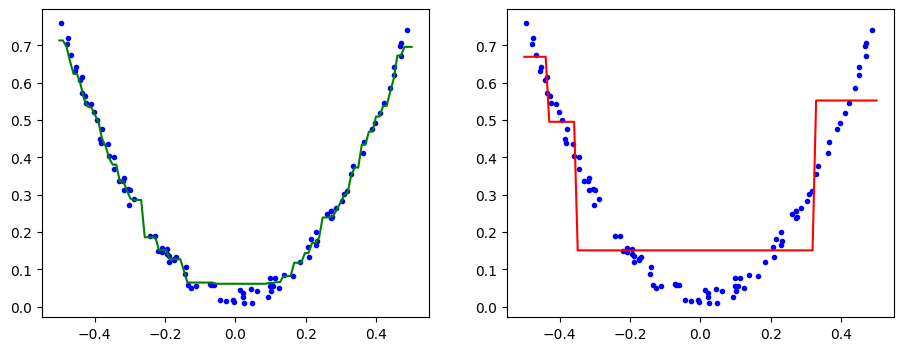

In [ ]:
import matplotlib.pyplot as plt
X_new = np.linspace(-0.5, 0.5, 100).reshape(-1, 1)

plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(X_new, gbrt_best.predict(X_new), "g-", label = 'Boosted')

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(X_new, tree_reg1.predict(X_new), "r-", label = 'Tree 1')

# ExtraGradientBoosting

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state = 42)
xgb_reg.fit(X, y)
xgb_reg.score(X, y)

0.9998882592833774

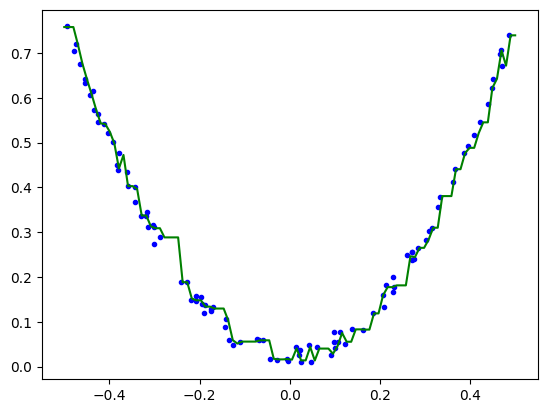

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, xgb_reg.predict(X_new), "g-", label = 'Boosted');

#Categorical Boosting

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool

catboost = CatBoostRegressor(iterations = 20, learning_rate = 1, depth = 2)
catboost.fit(X, y)
catboost.score(X, y)

0:	learn: 0.1400155	total: 46.4ms	remaining: 882ms
1:	learn: 0.1025487	total: 47.5ms	remaining: 428ms
2:	learn: 0.0905729	total: 48.1ms	remaining: 273ms
3:	learn: 0.0754797	total: 48.7ms	remaining: 195ms
4:	learn: 0.0722879	total: 49.1ms	remaining: 147ms
5:	learn: 0.0649306	total: 49.6ms	remaining: 116ms
6:	learn: 0.0613184	total: 50ms	remaining: 92.9ms
7:	learn: 0.0516266	total: 50.4ms	remaining: 75.6ms
8:	learn: 0.0485880	total: 50.8ms	remaining: 62ms
9:	learn: 0.0466235	total: 51.1ms	remaining: 51.1ms
10:	learn: 0.0439554	total: 51.5ms	remaining: 42.2ms
11:	learn: 0.0424314	total: 51.9ms	remaining: 34.6ms
12:	learn: 0.0407061	total: 52.3ms	remaining: 28.2ms
13:	learn: 0.0388979	total: 52.7ms	remaining: 22.6ms
14:	learn: 0.0385067	total: 53ms	remaining: 17.7ms
15:	learn: 0.0357694	total: 53.4ms	remaining: 13.3ms
16:	learn: 0.0345433	total: 53.7ms	remaining: 9.47ms
17:	learn: 0.0332475	total: 54ms	remaining: 6ms
18:	learn: 0.0306613	total: 54.4ms	remaining: 2.86ms
19:	learn: 0.0300191

0.9818826339866241

#Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

stack_clf = StackingClassifier(estimators = [
    ('lr', LogisticRegression(random_state = 42)),
    ('rf', RandomForestClassifier(random_state = 42)),
    ('svc', SVC(random_state = 42, probability = True))
],
                               final_estimator = RandomForestClassifier(random_state = 43)
)

stack_clf.fit(X_train, y_train)
stack_clf.score(X_test, y_test)

0.928